<a href="https://colab.research.google.com/github/JeyyGit/machine-learning-tasks/blob/main/week_7/UTS_ML_Random_Forest_Penguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **UTS Machine Learning_Random Forest_Penguins**
---
* Nama: Jaisy Malikulmulki Arasy
* NIM: `1103202201`
---
* Dataset: [*Penguins Dataset*](https://www.kaggle.com/datasets/youssefaboelwafa/clustering-penguins-species/)
* Model: Random Forest

## **Loading Penguin Dataset from Google Drive**
> `Prompt`: `give me a code to read from google drive '/Dataset/penguins.csv' and put it in a pandas dataframe called "df" in google colab`
>
> This code does the following:
>
> 1. Mounts your Google Drive to access files.
> 2. Specifies the file path of the CSV file in your Google Drive.
> 3. Uses pd.read_csv to read the CSV file into a Pandas DataFrame named df.
> 4. Displays the first few rows of the DataFrame using df.head().

1. culmen_length_mm: The length of the penguin's culmen (bill) in millimeters.
2. culmen_depth_mm: The depth of the penguin's culmen (bill) in millimeters.
3. flipper_length_mm: The length of the penguin's flipper in millimeters.
4. body_mass_g: The body mass of the penguin in grams.
5. sex: The gender of the penguin (male, female).

In [1]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# File path in Google Drive
file_path = '/content/drive/MyDrive/Dataset/penguins.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


Output: 5 first row of penguins dataframe 'df'

## **EDA**

> `Prompt`: `what is EDA and give methods of doing it with penguins dataset 'df'`
>
> Exploratory Data Analysis (EDA) is the process of analyzing and visualizing data sets to summarize their main characteristics, often with the help of statistical graphics and other data visualization methods. EDA helps to understand the structure of the data, identify patterns, relationships, and potential outliers, and inform subsequent modeling decisions.


In [2]:
# Display basic information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


Output:
1. The 'df' dataset has 344 rows with 5 columns
2. The numerical features are: "culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"
3. The categorical target name: "sex"

In [3]:
# Display summary statistics for numerical columns
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,214.014620,4201.754386
std,5.459584,1.974793,260.558057,801.954536
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.750000,4750.000000
max,59.600000,21.500000,5000.000000,6300.000000


Output: The statistic of each numerical columns from count, mean, standard deviation, mininum, Q1, Q2, Q3, and maximum

In [4]:
# Check for missing values in each column
df.isnull().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

Output:
* culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g has 2 missing values
* sex has 9 missing values

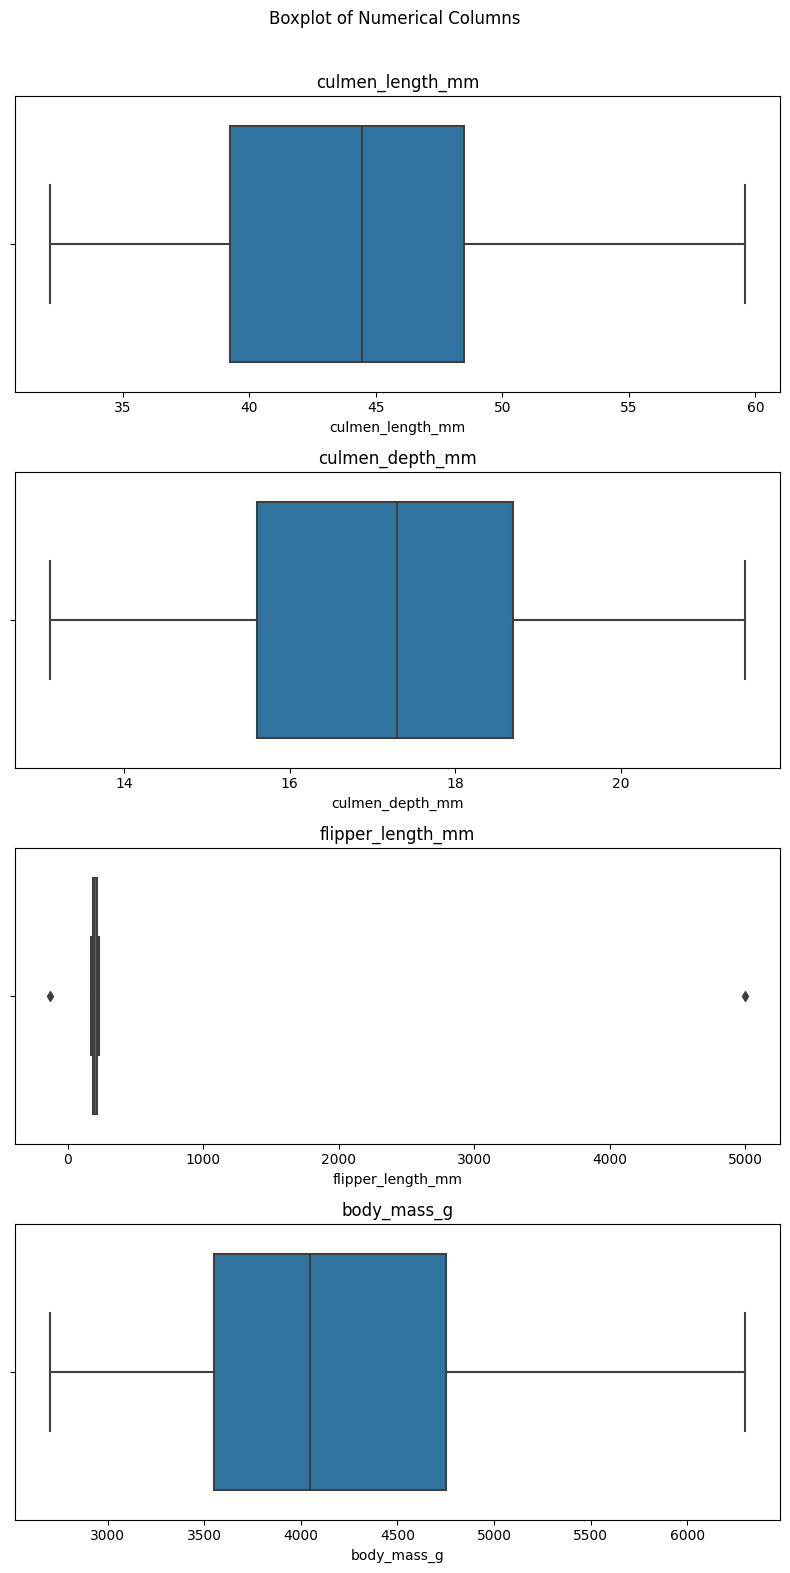

In [5]:
# Create box plots to identify outliers in numerical columns
import seaborn as sns
import matplotlib.pyplot as plt

# List of all numerical columns
numerical_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Create individual box plots for each numerical column
fig, axes = plt.subplots(nrows=len(numerical_columns), figsize=(8, 4 * len(numerical_columns)))
fig.suptitle('Boxplot of Numerical Columns')

for i, column in enumerate(numerical_columns):
    sns.boxplot(x=df[column], ax=axes[i]).set_title(column)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


Output:
* Every box plot of every numerical columns
* flipper_length_mm has outliers indicated by dots outside quartile


<Axes: xlabel='sex', ylabel='count'>

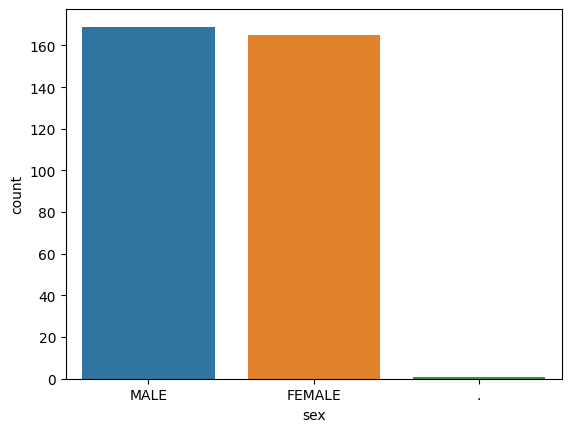

In [6]:
# Count plot for categorical data
import seaborn as sns
sns.countplot(x='sex', data=df)

Output:
* A bar chart of every value on "sex" column
* There's an outlier with value of "."

## **Removing NaN Values and Outliers**
Removing rows that has no values, detecting outliers with box plot, and removing outliers based on the IQR method
> `Prompt`: `give me a code to remove rows with any NaN values`
>
> If you want to remove rows with any NaN values from your DataFrame, you can use the dropna method.

> `Prompt`: `give me a code to remove other values from 'sex' column other than 'MALE' or 'FEMALE'`
>
> You can use the isin() method to filter the DataFrame based on the values in the 'sex' column.

> `Prompt`: `give me a code to remove the outliers from features with box plot`
>
> To remove outliers from your features using a box plot, you can use the interquartile range (IQR) method.

In [7]:
# Drop rows with any NaN values
df.dropna(inplace=True)

Output: dataframe with no rows that contain NaN values

In [8]:
# Check again for missing values in each column
df.isnull().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

Output: Checks so there is no more rows with NaN values

In [9]:
# Define the valid sex values that you want to keep
valid_sex_values = ['MALE', 'FEMALE']

# Use the isin() method to create a boolean mask
# This mask is True for rows where the 'sex' column is either 'MALE' or 'FEMALE'
sex_mask = df['sex'].isin(valid_sex_values)

# Use the boolean mask to filter the DataFrame
# This keeps only the rows where the condition (sex is either 'MALE' or 'FEMALE') is True
df = df[sex_mask]

Output: Dataframe without "sex" rows which has values beside "MALE" or "FEMALE"

<Axes: xlabel='sex', ylabel='count'>

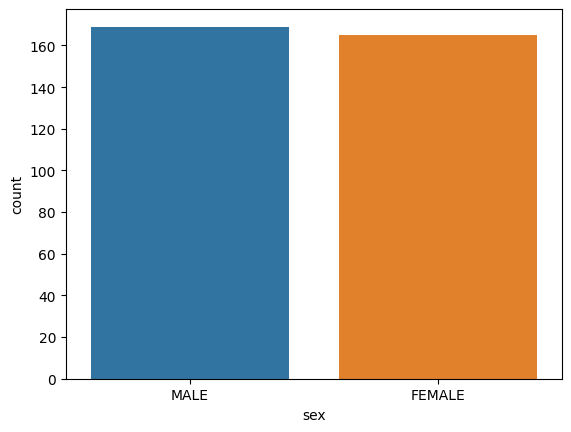

In [10]:
# Count plot for categorical data
import seaborn as sns
sns.countplot(x='sex', data=df)

Output: Checks to make sure there's no outlier on the column

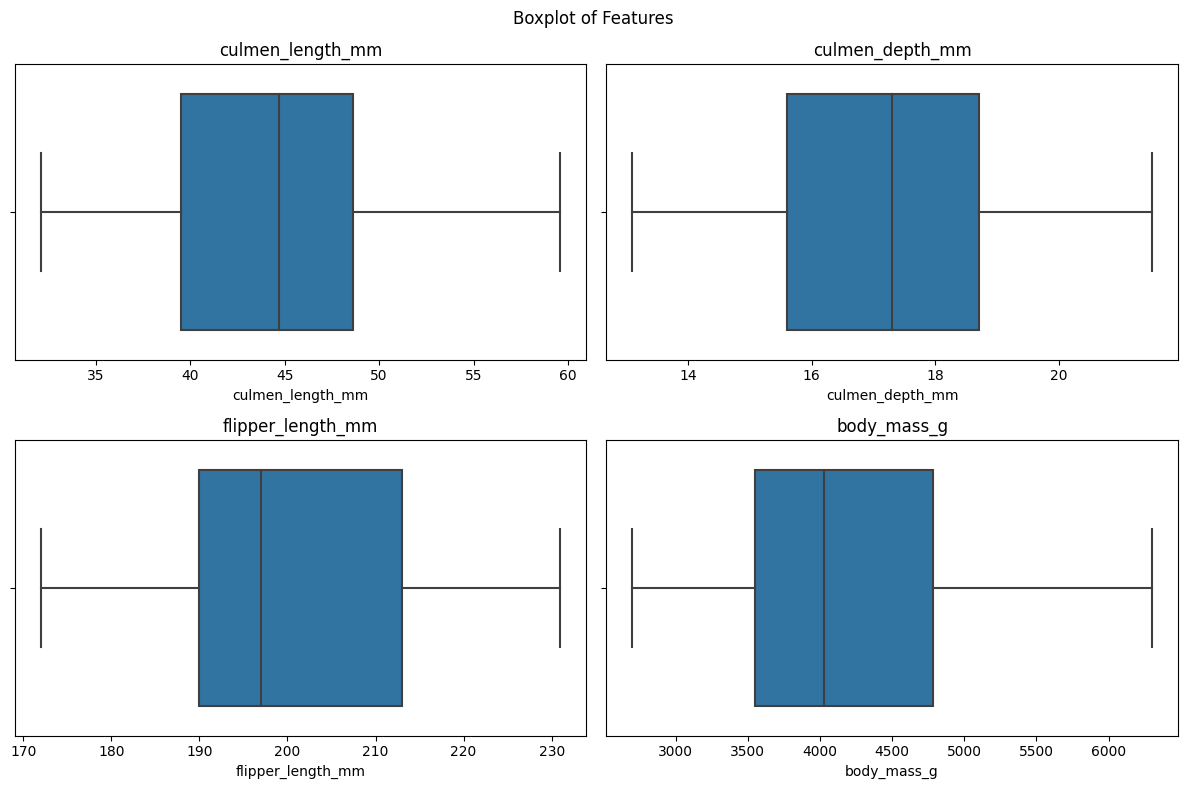

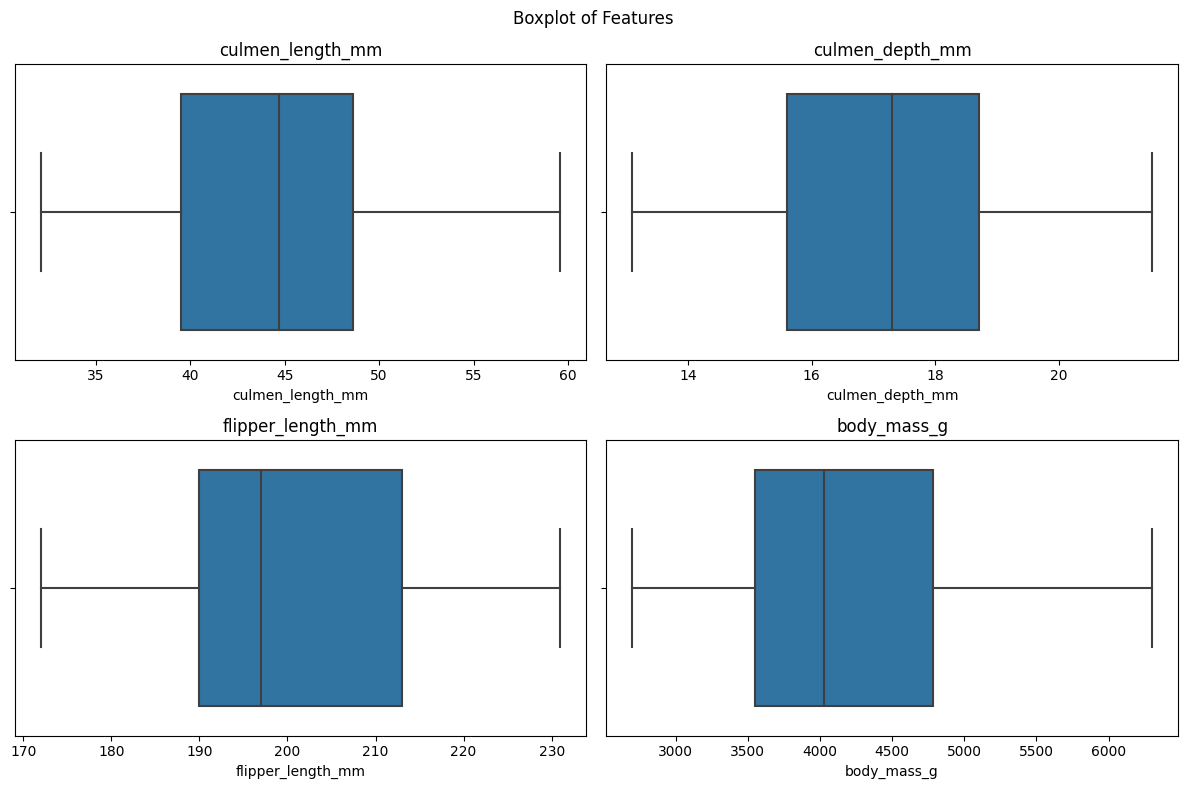

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create box plots for each feature separately
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle('Boxplot of Features')

# Loop through each feature and create a box plot in a separate subplot
features_list = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
for i, feature in enumerate(features_list):
    row = i // 2
    col = i % 2
    sns.boxplot(x=df[feature], ax=axes[row, col]).set_title(feature)

# Adjust layout
plt.tight_layout()
plt.show()

# Define a function to remove outliers based on the IQR method
def remove_outliers_iqr(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]

# Remove outliers for each feature
for column in df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']].columns:
    df = remove_outliers_iqr(df, column)

# Display box plots after removing outliers
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle('Boxplot of Features')

# Loop through each feature and create a box plot in a separate subplot
features_list = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
for i, feature in enumerate(features_list):
    row = i // 2
    col = i % 2
    sns.boxplot(x=df[feature], ax=axes[row, col]).set_title(feature)

# Adjust layout
plt.tight_layout()
plt.show()

Output: Dataframe with numerical column outliers removed and the new boxplot to check if the outlier is gone

## Data Visualization
Data visualization is the representation of data in a graphical or visual format to make it easier to understand, interpret, and derive insights from the data. It involves the use of charts, graphs, maps, and other visual elements to present complex information in a more accessible and comprehensible manner.
> `Prompt`: `give me some example of doing data visualization on penguin data`
>
> These visualizations provide insights into the distribution of individual features, relationships between features, and the distribution of categorical variables in your penguin dataset. You can customize these visualizations based on your specific analysis goals and questions about the data.

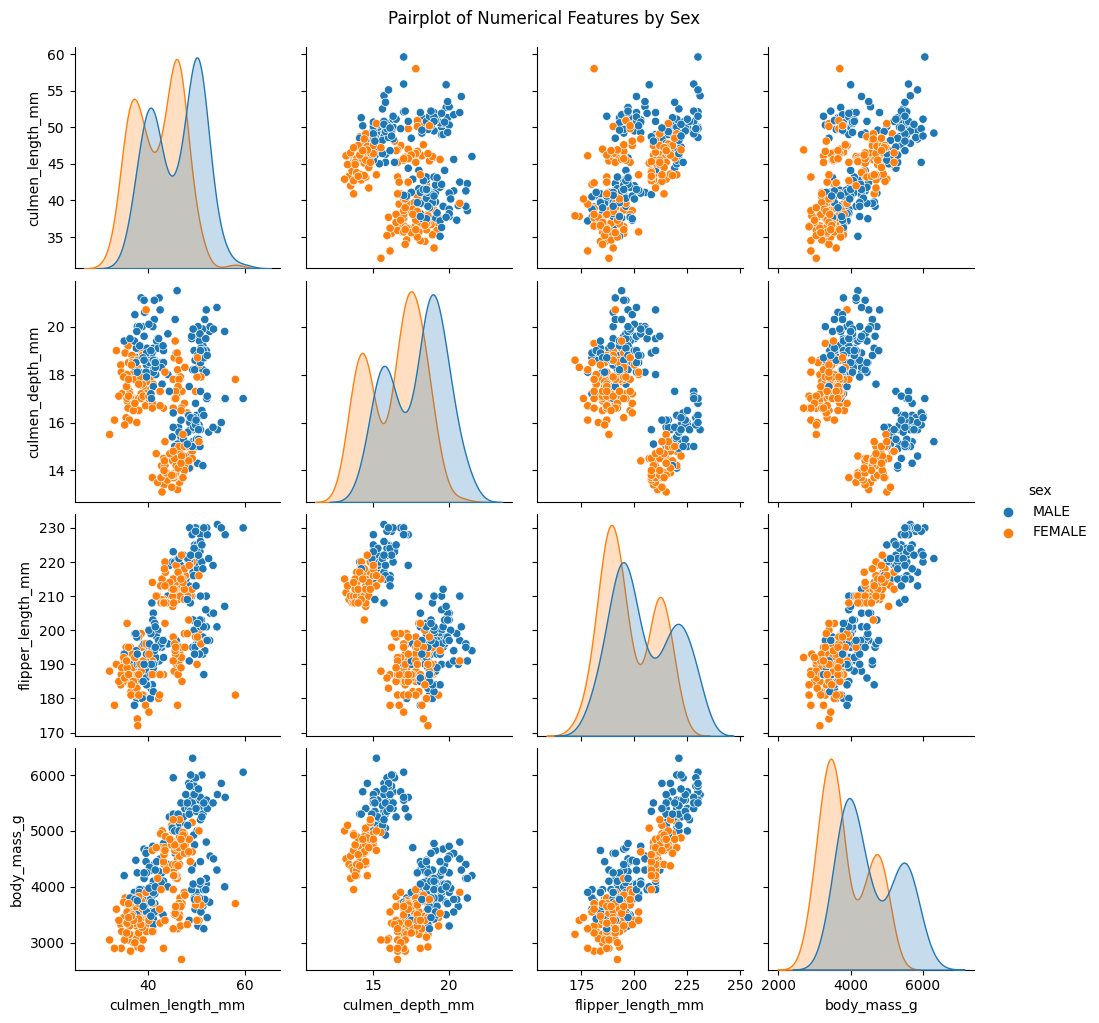

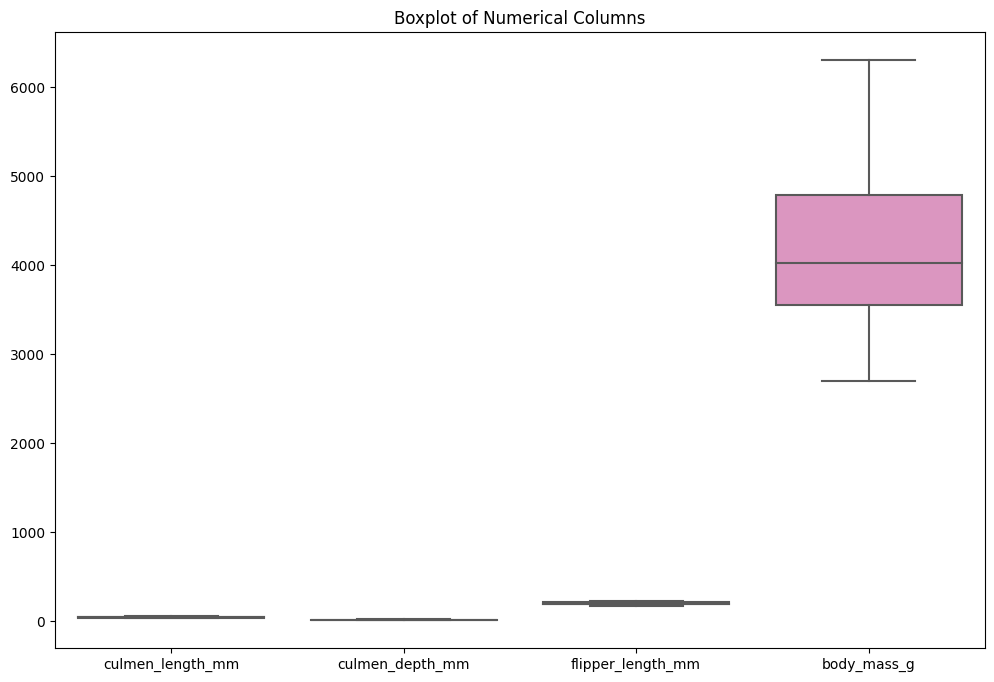

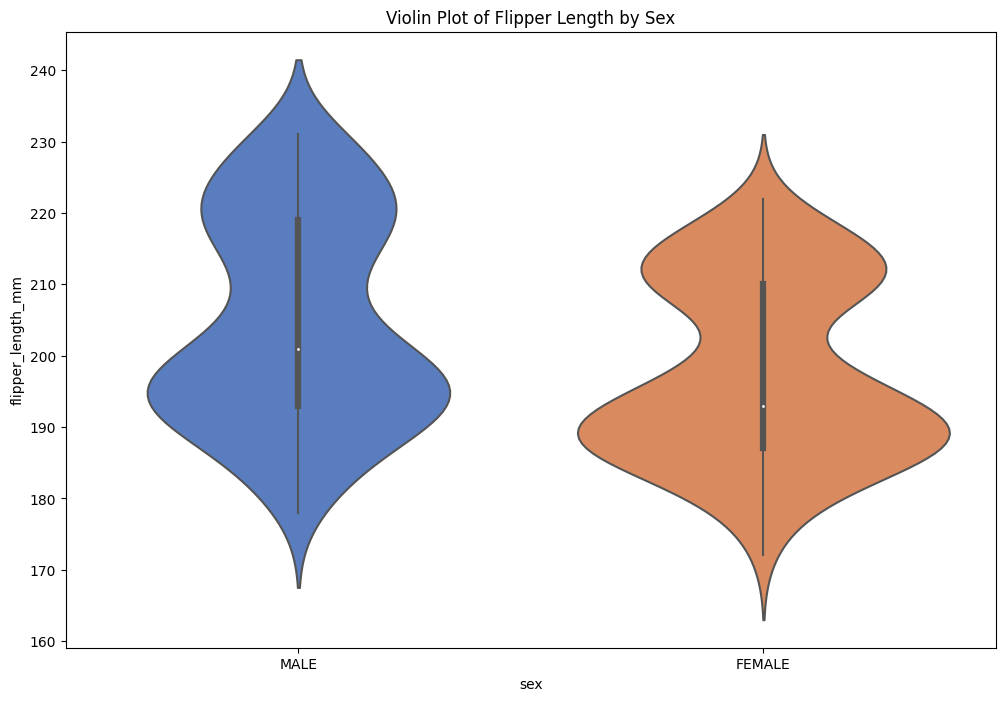

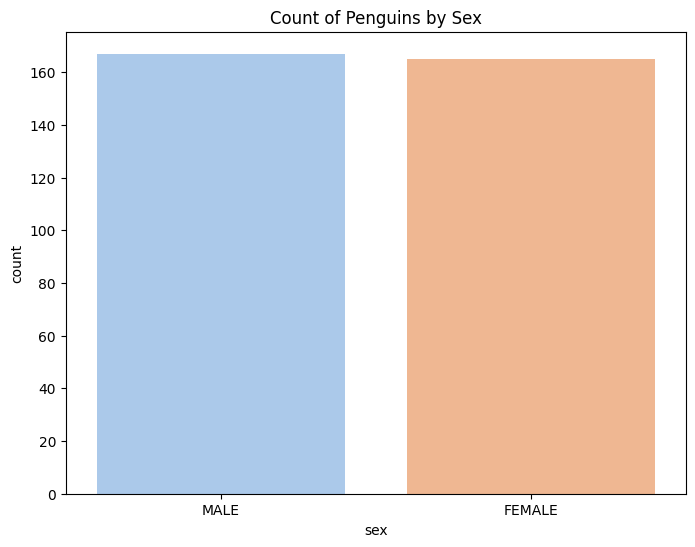

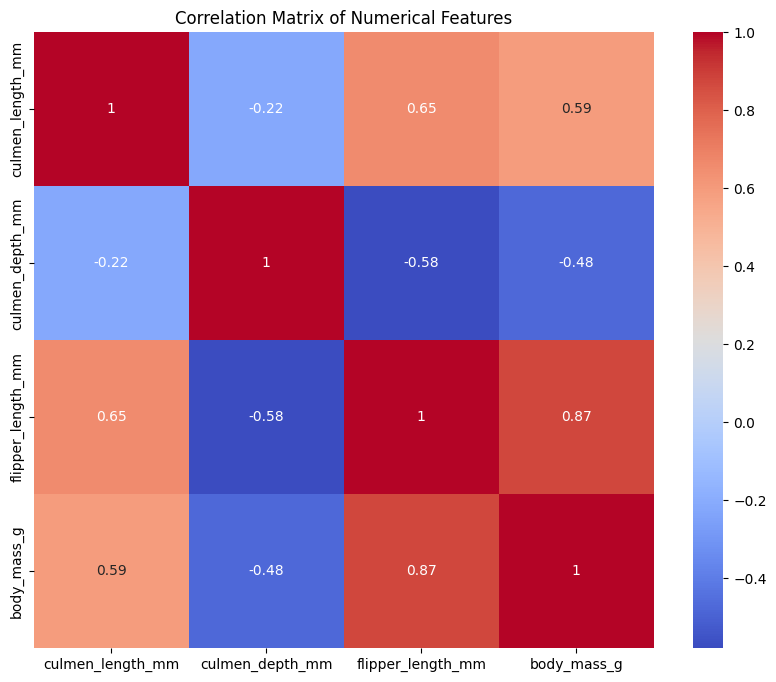

In [13]:
# 1. Pairplot to visualize relationships between numerical features
sns.pairplot(df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']], hue='sex')
plt.suptitle('Pairplot of Numerical Features by Sex', y=1.02)
plt.show()

# 2. Boxplot for each numerical feature
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']], palette="Set2")
plt.title('Boxplot of Numerical Columns')
plt.show()

# 3. Violin plot to visualize the distribution of numerical features by sex
plt.figure(figsize=(12, 8))
sns.violinplot(x='sex', y='flipper_length_mm', data=df, palette="muted")
plt.title('Violin Plot of Flipper Length by Sex')
plt.show()

# 4. Count plot to visualize the distribution of the 'sex' variable
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', data=df, palette="pastel")
plt.title('Count of Penguins by Sex')
plt.show()

# 5. Heatmap to visualize the correlation matrix of numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']].corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Output:
* Pair plot of every numerical columns by target column
* Box plot of every numerical columns
* Violin plot of flipper_length_mm column by target column
* Count of penguins by sex column
* The correlation matrix heatmap of every numerical columns

## Training Random Forest Model
A Random Forest is an ensemble learning method that can be used for both classification and regression tasks. It operates by constructing a multitude of decision trees during training and outputs the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

### Splitting The Dataset
Splitting the dataset is a fundamental step in the process of building and evaluating machine learning models. It involves dividing your dataset into two or more parts: typically a training set and a testing (or validation) set. The purpose of splitting the dataset is to train the model on one subset of the data and evaluate its performance on another, unseen subset.
> `Prompt`: `give me a code to split penguins dataset with features: ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'] and target: 'sex'`

In [14]:
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame
features = df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]
target = df['sex']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (265, 4)
X_test shape: (67, 4)
y_train shape: (265,)
y_test shape: (67,)


### Training The Dataset
> `Prompt`: `give me a  code to train the dataset with random forest`

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
random_forest.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = random_forest.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9104477611940298

Classification Report:
               precision    recall  f1-score   support

      FEMALE       0.97      0.86      0.91        37
        MALE       0.85      0.97      0.91        30

    accuracy                           0.91        67
   macro avg       0.91      0.92      0.91        67
weighted avg       0.92      0.91      0.91        67



Output:
* The accuracy score of the trained model is 91%
* Precision: Precision is the ratio of true positive predictions to the total predicted positives. It measures the accuracy of the positive predictions.
* Recall (Sensitivity or True Positive Rate): Recall is the ratio of true positive predictions to the total actual positives. It measures the ability of the classifier to capture all positive instances.
* F1-Score: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall.
* Support: Support is the number of actual occurrences of the class in the specified dataset.
* Accuracy: Accuracy is the ratio of correctly predicted instances to the total instances. It provides an overall measure of the model's performance.

## New Data Input Test

In [20]:
# 'new_data' is a new DataFrame with the same features
new_data = pd.DataFrame({
    'culmen_length_mm': [40.0],
    'culmen_depth_mm': [17.5],
    'flipper_length_mm': [185.0],
    'body_mass_g': [3700.0]
})

# Predict the 'sex' for the new data
new_data_predictions = random_forest.predict(new_data)

# Print the predictions
print("Predicted 'sex' for new data:")
print(new_data_predictions)

Predicted 'sex' for new data:
['FEMALE']


Output: Prediction of new data we inputted which is Female.